## Final Project Submission

Please fill out:
* Student name: Andi Osika
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


# Project Description:

The dataset for this project was provided to us: "kc_house_data.csv", to explore and model with multivariate linear regression to predict the sale price of houses as accurately as possible. 



# Obtain: Import Tools /  Data

This particular dataset was provided for this project and included

In [1]:
##import necessary tools and data

!pip install -U fsds_100719
from fsds_100719.imports import *
##Loads 
#Handle	Package	Description
#dp	IPython.display	Display modules with helpful display and clearing commands.
#fs	fsds_100719	Custom data science bootcamp student package
#mpl	matplotlib	Matplotlib's base OOP module with formatting artists
#plt	matplotlib.pyplot	Matplotlib's matlab-like plotting module
#np	numpy	scientific computing with Python
#pd	pandas	High performance data structures and tools
#sns	seaborn	High-level data visualization library based on matplotlib

kc = pd.read_csv("kc_house_data.csv")


In [2]:
import scipy.stats as stats


In [3]:
pd.set_option('display.max_columns',0)

# Examine the Data

### Initial examination 

In [4]:
kc.head()

id        date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  10/13/2014  221900.0  ... -122.257           1340        5650
1  6414100192   12/9/2014  538000.0  ... -122.319           1690        7639
2  5631500400   2/25/2015  180000.0  ... -122.233           2720        8062
3  2487200875   12/9/2014  604000.0  ... -122.393           1360        5000
4  1954400510   2/18/2015  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

In [5]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Observations and Initial Background Research:
Upon initial inspection, one can determine this dataset contains 21 columns containing various types of values in each ranging from objects, to numeric both as integers and floats.  Some columns that are labeled year are carrying values as float and integers and will need to be converted. Out of the 21,597 rows of data, there are a three missing values including:

    -waterfront
    -view
    -yr_renovated

The next step would be to further inspect the values in each column to validate assumptions and determine what the corresponding values indicate or measure.

By doing a quick search on the zip codes and title of the file one can determine that this is a dataset for real estate information in King County, Washington.  This county includes Washington state's largest cities including Seattle, Kirkland, Renton, Bellevue as well as some small and remote areas including islands and those in mountain ranges.

Also looked here for some initial background: https://www.kingcounty.gov/depts/assessor.aspx

### Background on King County:
King County is home to Washington's largest cities including Seattle, Kirkland, Renton, Bellevue as well as vast rural 
rural communities including islands and those in mountain ranges.  Tech and retail are big industries in king county https://datausa.io/profile/geo/king-county-wa#housing as well as health care.  There is plenty of art and culture in these urban areas and the vast rural areas offer many activities making King County a desirable place to live. Median houshold income was around $75K in 2014-2015.

Map with King County: https://localscape.spatialest.com/#kingcountyassessor/Tax


In [6]:
# Further inspecting the data:
kc.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.159700e+04  2.159700e+04  ...   21597.000000   21597.000000
mean   4.580474e+09  5.402966e+05  ...    1986.620318   12758.283512
std    2.876736e+09  3.673681e+05  ...     685.230472   27274.441950
min    1.000102e+06  7.800000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.220000e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 19 columns]

## Looked at variables to gain insight to their meaning:  https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r


Some variables weren't searchable  (go back and cross reference put an ** next to assumed

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

  X waterfront - A binary variable that seems to be proven not applicable only .06% of this was marked as a true value

view - An index assigned on a scale from 0 to 4 of how good the view of the property

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. (See Glossary in Area Report for Residential Building Grades in use by the King County Department of Assessments.)

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

   X yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


In [7]:
kc['date'].describe()

count         21597
unique          372
top       6/23/2014
freq            142
Name: date, dtype: object

## Initial thoughts and questions:
   1) Is latitude and longitude redundant for location with zip code? What will be the best way to show location a factor in predicting price?
   
   2) Age of the home vs renovation? How would I deal with that? Not all homes are renovated.
  

## Function to help investigate specific columns

In [33]:
def check_column(df, col_name, n_unique=10):
    """Displays info on null values, datatype, unqiue values
    and displays .describe()
    
    Args:
        df (df): contains the columns
        col_name (str): name of the df column to show
        n_unique (int): Number of unique values top show.
    
    Return:
        fig, ax (Matplotlib Figure and Axes)
    """
    
    print('DataType:')
    print('\t',df[col_name].dtypes)
    
    num_nulls = df[col_name].isna().sum()
    print(f'Null Values Present = {num_nulls}')
    
    display(df[col_name].describe().round(3))
    
    print('\nValue Counts:')
    display(df[col_name].value_counts(n_unique)) 
    
 
    
    ## Add some EDA figures
    fig, ax = plt.subplots(ncols=2);
    
    df[col_name].hist(ax=ax[0])
    ax[1].scatter(df[col_name], kc['price'])
    
    return fig,ax

#check_column(df,'condition')

In [9]:
#filtering four outliers code:
#z_score = np.abs(stats.zscore(kc['colname'])

#above_three = []

#for index, value in enjumerate(z_score):
                 #if value > 3:
                 #above_three.append(index)
                 
                 

# SCRUB: Initial Data Cleaning

In [10]:
display(kc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

In [11]:
## Initial changes to convert objects into useable data:

# 1) date from object to date time:
kc['date'] = pd.to_datetime(kc['date'])

# 2) date from int to date time:

kc['yr_built'] = pd.to_datetime(kc['yr_built'], format=('%Y'))

# 3) change sqft_basement to into numeric value
kc['sqft_basement'] = pd.to_numeric(kc['sqft_basement'],errors='coerce')


### Addressing renovations by adding a cloumn: last_upgrade to illustrate when a home had been most recently upgraded to address the idea that not all homes are renovated.

Observations: only a small amount of homes were renovated out of 21K .03%  indicating that the trend is not to renovate or it's not accurately recorded.

In [12]:
kc.head()

id       date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520 2014-10-13  221900.0  ... -122.257           1340        5650
1  6414100192 2014-12-09  538000.0  ... -122.319           1690        7639
2  5631500400 2015-02-25  180000.0  ... -122.233           2720        8062
3  2487200875 2014-12-09  604000.0  ... -122.393           1360        5000
4  1954400510 2015-02-18  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

In [13]:
#filling in null values for yr_renovated
kc['yr_renovated'].fillna(0, inplace=True)

In [14]:
#dropping decimals from yr_renovated using math.trunc()
import math
kc['yr_reno'] = kc['yr_renovated'].apply(lambda x:math.trunc(x))

### Observation on yr_renovated: 

Only 70 homes renovated out of 21K?  That's .03%...either this is a true trend that renovations don't happen OR it's not properly captured in this dataset. Also, no correlation

DataType:
	 int64
Null Values Present = 0


count    21597.000
mean        68.758
std        364.037
min          0.000
25%          0.000
50%          0.000
75%          0.000
max       2015.000
Name: yr_reno, dtype: float64


Value Counts:


0       0.965551
2014    0.003380
2003    0.001435
2013    0.001435
2007    0.001389
          ...   
1976    0.000046
1953    0.000046
1951    0.000046
1946    0.000046
1944    0.000046
Name: yr_reno, Length: 70, dtype: float64

ValueError: x and y must be the same size

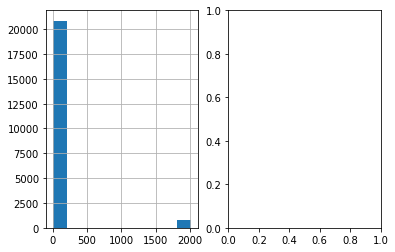

In [21]:
check_column(kc, 'yr_reno')

In [22]:
kc.head()

id       date     price  ...  sqft_living15  sqft_lot15  yr_reno
0  7129300520 2014-10-13  221900.0  ...           1340        5650        0
1  6414100192 2014-12-09  538000.0  ...           1690        7639     1991
2  5631500400 2015-02-25  180000.0  ...           2720        8062        0
3  2487200875 2014-12-09  604000.0  ...           1360        5000        0
4  1954400510 2015-02-18  510000.0  ...           1800        7503        0

[5 rows x 22 columns]

In [23]:
kc.index[200]

200

In [24]:
type(kc['yr_built'])

pandas.core.series.Series

In [25]:
kc['yr_built'] = kc['yr_built'].apply(lambda x: x.year)

In [26]:
kc.head()

id       date     price  ...  sqft_living15  sqft_lot15  yr_reno
0  7129300520 2014-10-13  221900.0  ...           1340        5650        0
1  6414100192 2014-12-09  538000.0  ...           1690        7639     1991
2  5631500400 2015-02-25  180000.0  ...           2720        8062        0
3  2487200875 2014-12-09  604000.0  ...           1360        5000        0
4  1954400510 2015-02-18  510000.0  ...           1800        7503        0

[5 rows x 22 columns]

In [29]:
kc['last_upgrade'] = np.where(kc['yr_reno']==0, kc['yr_built'], kc['yr_reno'])

In [28]:
kc.head()

id       date     price  ...  sqft_lot15  yr_reno  last_upgrade
0  7129300520 2014-10-13  221900.0  ...        5650        0          1955
1  6414100192 2014-12-09  538000.0  ...        7639     1991          1991
2  5631500400 2015-02-25  180000.0  ...        8062        0          1933
3  2487200875 2014-12-09  604000.0  ...        5000        0          1965
4  1954400510 2015-02-18  510000.0  ...        7503        0          1987

[5 rows x 23 columns]

In [30]:
kc['yrs_since_last_upgrade'] = 2019 - kc['last_upgrade']

DataType:
	 int64
Null Values Present = 0


count    21597.000
mean        46.055
std         28.945
min          4.000
25%         20.000
50%         42.000
75%         65.000
max        119.000
Name: yrs_since_last_upgrade, dtype: float64


Value Counts:


5      0.029263
14     0.022179
13     0.021901
15     0.021068
16     0.020836
         ...   
118    0.001296
117    0.001204
86     0.001111
84     0.000926
85     0.000695
Name: yrs_since_last_upgrade, Length: 116, dtype: float64

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000209A235F7F0>,
       dtype=object))

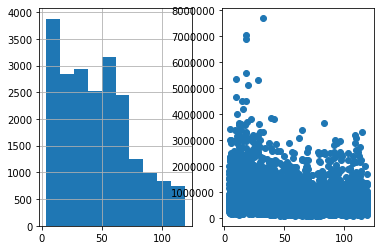

In [34]:
check_column(kc, 'yrs_since_last_upgrade')

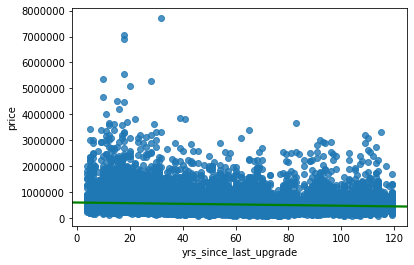

In [35]:
sns.regplot(kc['yrs_since_last_upgrade'], kc['price'],line_kws={"color": "green"})

In [36]:
kc.head()

id       date  ...  last_upgrade  yrs_since_last_upgrade
0  7129300520 2014-10-13  ...          1955                      64
1  6414100192 2014-12-09  ...          1991                      28
2  5631500400 2015-02-25  ...          1933                      86
3  2487200875 2014-12-09  ...          1965                      54
4  1954400510 2015-02-18  ...          1987                      32

[5 rows x 24 columns]

In [37]:
kc['yr_renovated'].describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [38]:
kc.head(10)

id       date  ...  last_upgrade  yrs_since_last_upgrade
0  7129300520 2014-10-13  ...          1955                      64
1  6414100192 2014-12-09  ...          1991                      28
2  5631500400 2015-02-25  ...          1933                      86
3  2487200875 2014-12-09  ...          1965                      54
4  1954400510 2015-02-18  ...          1987                      32
5  7237550310 2014-05-12  ...          2001                      18
6  1321400060 2014-06-27  ...          1995                      24
7  2008000270 2015-01-15  ...          1963                      56
8  2414600126 2015-04-15  ...          1960                      59
9  3793500160 2015-03-12  ...          2003                      16

[10 rows x 24 columns]

In [39]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
id                        21597 non-null int64
date                      21597 non-null datetime64[ns]
price                     21597 non-null float64
bedrooms                  21597 non-null int64
bathrooms                 21597 non-null float64
sqft_living               21597 non-null int64
sqft_lot                  21597 non-null int64
floors                    21597 non-null float64
waterfront                19221 non-null float64
view                      21534 non-null float64
condition                 21597 non-null int64
grade                     21597 non-null int64
sqft_above                21597 non-null int64
sqft_basement             21143 non-null float64
yr_built                  21597 non-null int64
yr_renovated              21597 non-null float64
zipcode                   21597 non-null int64
lat                       21597 non-null float64
long                

In [40]:
kc.index[200]

200

## Looking for duplicates:

In [41]:
duplicates = kc[kc.duplicated()]
print(len(duplicates))
duplicates.head()

0


Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, yr_reno, last_upgrade, yrs_since_last_upgrade]
Index: []

## Dealing with Null Values
    
    Dropping null values found in view and sqft_basement since they are relatively small amounts of data at .02% and 2% respectively.

In [42]:
## Looking for null values:
nulls = kc.isnull().sum()
print(nulls[nulls > 0])

waterfront       2376
view               63
sqft_basement     454
dtype: int64


In [43]:
#Examining missing data in terms of percentages
kc.isnull().sum() / len(kc.index)

id                        0.000000
date                      0.000000
price                     0.000000
bedrooms                  0.000000
bathrooms                 0.000000
sqft_living               0.000000
sqft_lot                  0.000000
floors                    0.000000
waterfront                0.110015
view                      0.002917
condition                 0.000000
grade                     0.000000
sqft_above                0.000000
sqft_basement             0.021021
yr_built                  0.000000
yr_renovated              0.000000
zipcode                   0.000000
lat                       0.000000
long                      0.000000
sqft_living15             0.000000
sqft_lot15                0.000000
yr_reno                   0.000000
last_upgrade              0.000000
yrs_since_last_upgrade    0.000000
dtype: float64

### Dropping the null values 'view' and 'sft_basement' since they are  @.02%, and 2% respectively is appropriate and preserves a good majority of overall data.

In [ ]:
#it wold be acceptable to drop values for view and sft_basement since they are insignificant @.02%, and 2% respectively
kc.dropna(subset= ['view'], inplace=True)
kc.dropna(subset=['sqft_basement'], inplace=True)

In [ ]:
##curious about yr_renovated... not all homes were/are renovated exploring:
kc['yr_renovated'].describe()

## Dropping the variable "waterfront" based on the fact that only .06% of this data was populated with a binary value of 1 for this field.  Considering that King County sits on many bodies of water, including Puget Sound, 33 lakes and multiple rivers https://en.wikipedia.org/wiki/Category:Lakes_of_King_County,_Washington 

This data may have been incorrectly recorded or is describing a very small set of data that does not apply to the data as a whole.


In [44]:
##next missing value set: watherfront
kc['waterfront'].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

'waterfront' appears to be a binary value, so it wouldn't make sense to fill value with mean.
It might make sense to populate with zeros since if a property was 'waterfront', it would be marked as such. Since it tends to be more than 10% of the data, exploring further to see if there are any contextual clues that may indicate 'waterfront'

In [ ]:
kc['waterfront'].value_counts() / len(kc.index)

In [ ]:
#dropping the waterfront column
kc.drop('waterfront', axis=1, inplace=True)

In [ ]:
##all null values are clear
kc.isnull().sum()

# Explore: Further Data Inspection

Checking for duplicates

In [45]:
kc.describe()

id         price  ...  last_upgrade  yrs_since_last_upgrade
count  2.159700e+04  2.159700e+04  ...  21597.000000            21597.000000
mean   4.580474e+09  5.402966e+05  ...   1972.945131               46.054869
std    2.876736e+09  3.673681e+05  ...     28.945393               28.945393
min    1.000102e+06  7.800000e+04  ...   1900.000000                4.000000
25%    2.123049e+09  3.220000e+05  ...   1954.000000               20.000000
50%    3.904930e+09  4.500000e+05  ...   1977.000000               42.000000
75%    7.308900e+09  6.450000e+05  ...   1999.000000               65.000000
max    9.900000e+09  7.700000e+06  ...   2015.000000              119.000000

[8 rows x 23 columns]

In [47]:
duplicates = kc[kc.duplicated()]
print(len(duplicates))
duplicates.head()

0


Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, yr_reno, last_upgrade, yrs_since_last_upgrade]
Index: []

## Visual Inspections to identify data types:
    Evaluating data to determine if it is numeric or categorical in nature

### Initial Histograms: 

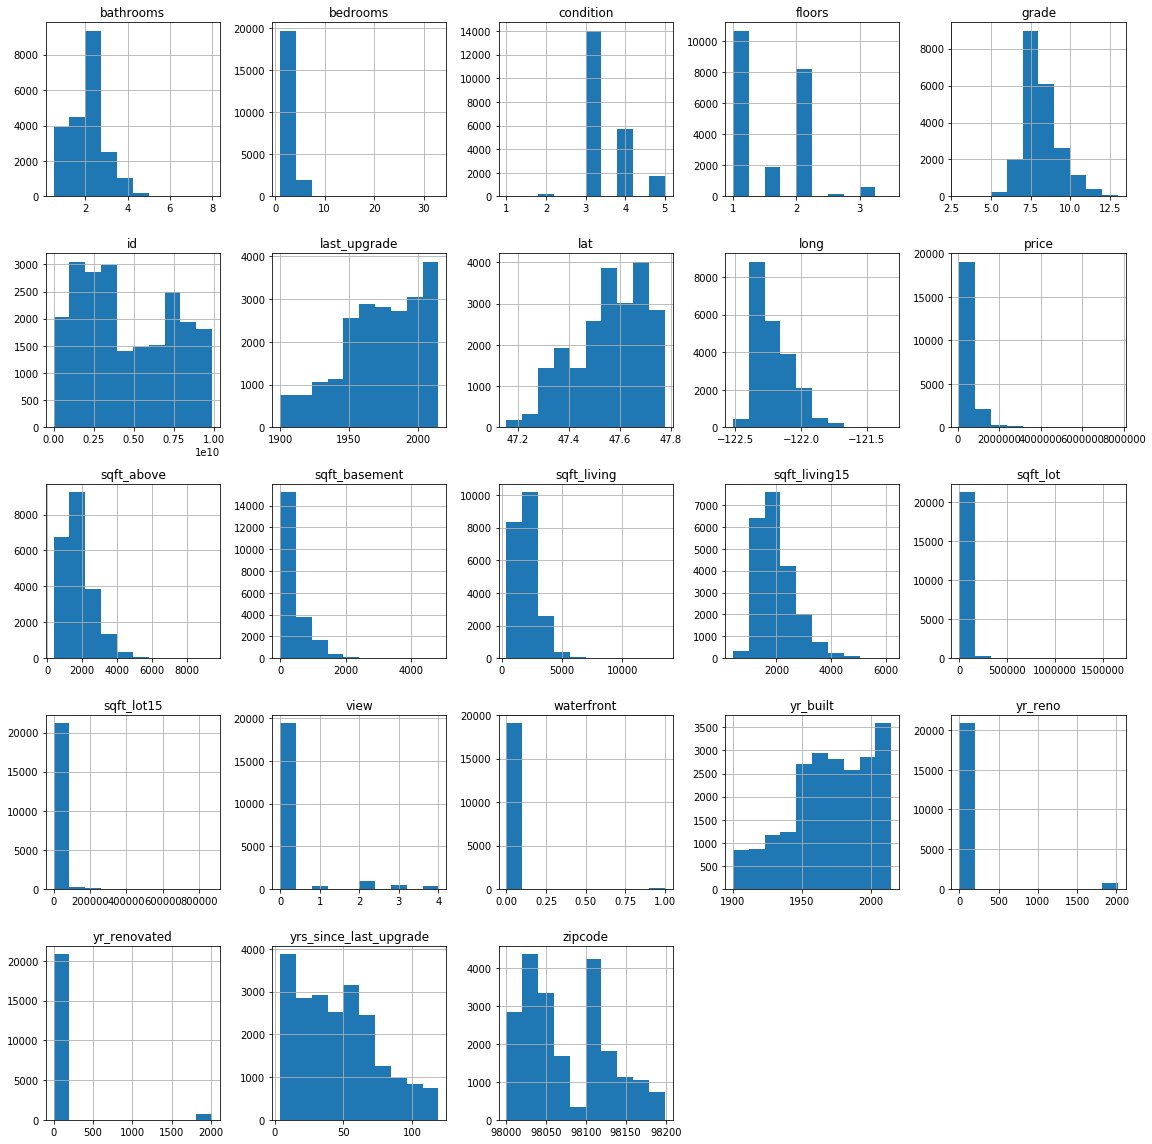

In [48]:
kc.hist(figsize=(16,16));
plt.tight_layout()

### Initial Scatter Matrix

In [49]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,16)

In [50]:
#pd.plotting.scatter_matrix(kc);

In looking at data, **decide to drop ID** - this is a unique identifier that is assigned after a home is listed and who's purpose is to track the individual record rather than to quantify attributes of a property.


### Also in viewing the scatter plot several categories demonstrate categorical patterns.


In [51]:
#dropping the waterfront column
kc.drop('id', axis=1, inplace=True)

## Inspecting columns that could be categorical data :
    - floors -assigned category code
    - view - assigned category code
    - condition - assigned category code
    - grade - assigned category code
    - zipcode - assigned a category code after evaluation.
    
    ...and cleaning and looking for initial correlation


In [52]:
kc.head()

date     price  bedrooms  ...  yr_reno  last_upgrade  yrs_since_last_upgrade
0 2014-10-13  221900.0         3  ...        0          1955                      64
1 2014-12-09  538000.0         3  ...     1991          1991                      28
2 2015-02-25  180000.0         2  ...        0          1933                      86
3 2014-12-09  604000.0         4  ...        0          1965                      54
4 2015-02-18  510000.0         3  ...        0          1987                      32

[5 rows x 23 columns]

In [53]:
kc.index[200]

200

### Floors 

no obvious  clear correlation upon initial inspection

In [54]:
kc['floors'].describe()

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [55]:
cat_floors = kc['floors'].astype('category')
coded_floors = cat_floors.cat.codes
kc['floors'] = coded_floors

In [56]:
check_column(kc, 'floors')

DataType:
	 int8
Null Values Present = 0


count    21597.000
mean         0.988
std          1.079
min          0.000
25%          0.000
50%          1.000
75%          2.000
max          5.000
Name: floors, dtype: float64


Value Counts:


0    0.494189
2    0.381303
1    0.088438
4    0.028291
3    0.007455
5    0.000324
Name: floors, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000209A14160F0>,
       dtype=object))

see no real correlation between price and floors

### View

no clear correlation upon inital inspection

In [57]:
kc['view'].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [58]:
kc['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [59]:
cat_view = kc['view'].astype('category')
coded_view = cat_view.cat.codes
kc['view'] = coded_view

DataType:
	 int8
Null Values Present = 0


count    21597.000
mean         0.230
std          0.767
min         -1.000
25%          0.000
50%          0.000
75%          0.000
max          4.000
Name: view, dtype: float64


Value Counts:


 0    0.899292
 2    0.044312
 3    0.023522
 1    0.015280
 4    0.014678
-1    0.002917
Name: view, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000209A1E52208>,
       dtype=object))

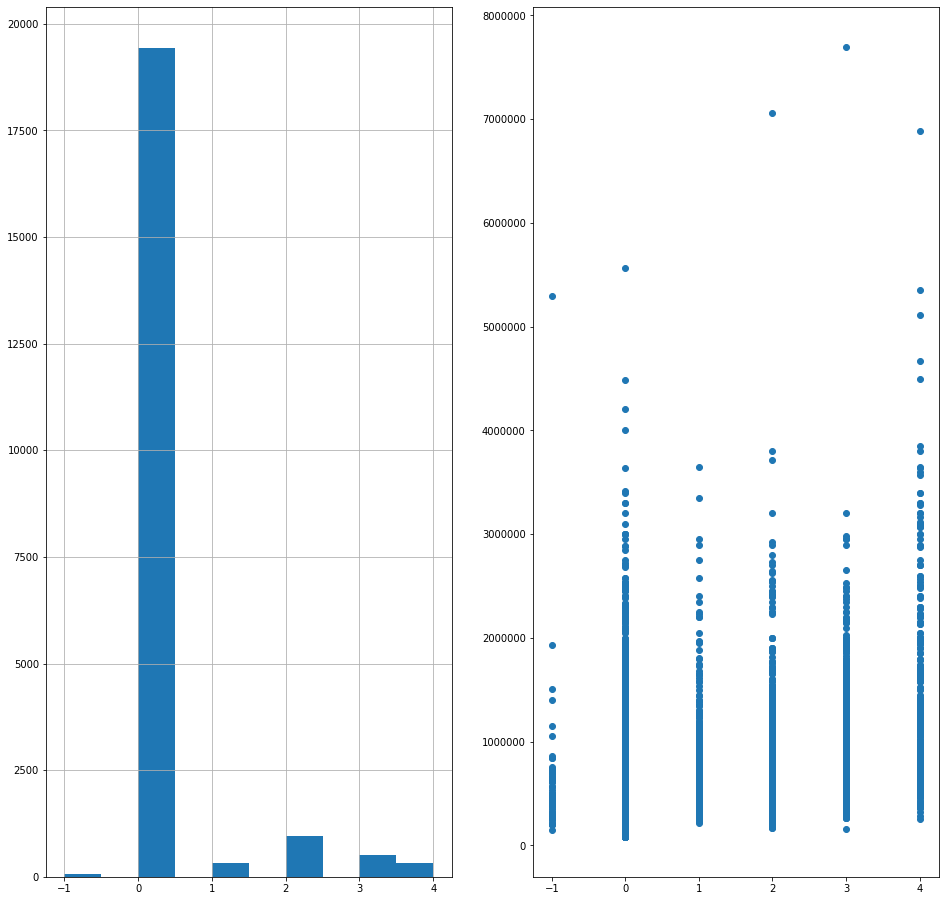

In [60]:
check_column(kc, 'view')

no clear correlation between price and view - would be ok dropping this .. 

### Condition price increases with a value of '2'
 Notes: Categorical values scale 1-5 ; mean is 2.4 std .65 13K of 21K are 2.4's

In [61]:
kc.index[200]

200

In [62]:
kc['condition'].describe()

count    21597.000000
mean         3.409825
std          0.650546
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [63]:
kc['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [64]:
cat_condition = kc['condition'].astype('category')
coded_condition = cat_condition.cat.codes
kc['condition'] = coded_condition

DataType:
	 int8
Null Values Present = 0


count    21597.000
mean         2.410
std          0.651
min          0.000
25%          2.000
50%          2.000
75%          3.000
max          4.000
Name: condition, dtype: float64


Value Counts:


2    0.649164
3    0.262861
4    0.078761
1    0.007871
0    0.001343
Name: condition, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000209A1396E10>,
       dtype=object))

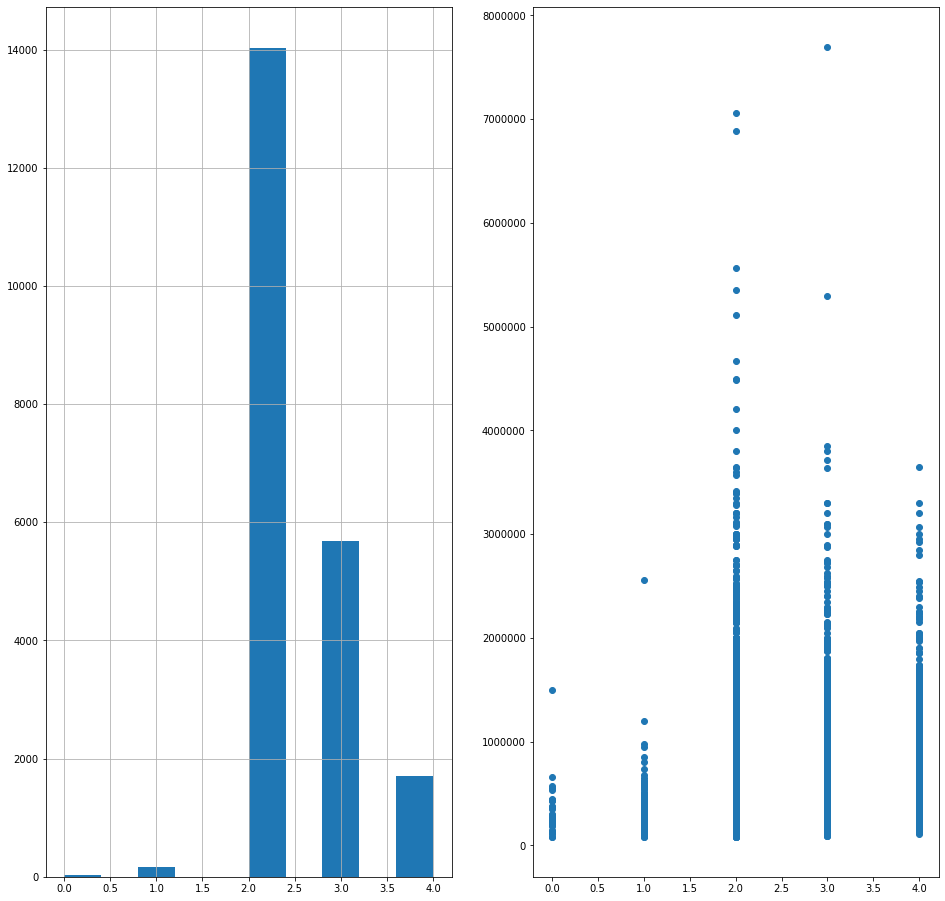

In [65]:
check_column(kc, 'condition')

### Grade

**Initial inspection shows correlation** : Distribution looks normal, initial Mean 7.5. std 1.17 there are some outliers ...

In [66]:
kc['grade'].describe()

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [67]:
kc['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [68]:
cat_grade = kc['grade'].astype('category')
coded_grade = cat_grade.cat.codes
kc['grade'] = coded_grade

DataType:
	 int8
Null Values Present = 0


count    21597.000
mean         4.658
std          1.173
min          0.000
25%          4.000
50%          4.000
75%          5.000
max         10.000
Name: grade, dtype: float64


Value Counts:


4     0.415521
5     0.280826
6     0.121082
3     0.094365
7     0.052507
8     0.018475
2     0.011205
9     0.004121
1     0.001250
10    0.000602
0     0.000046
Name: grade, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000209A15D3C18>,
       dtype=object))

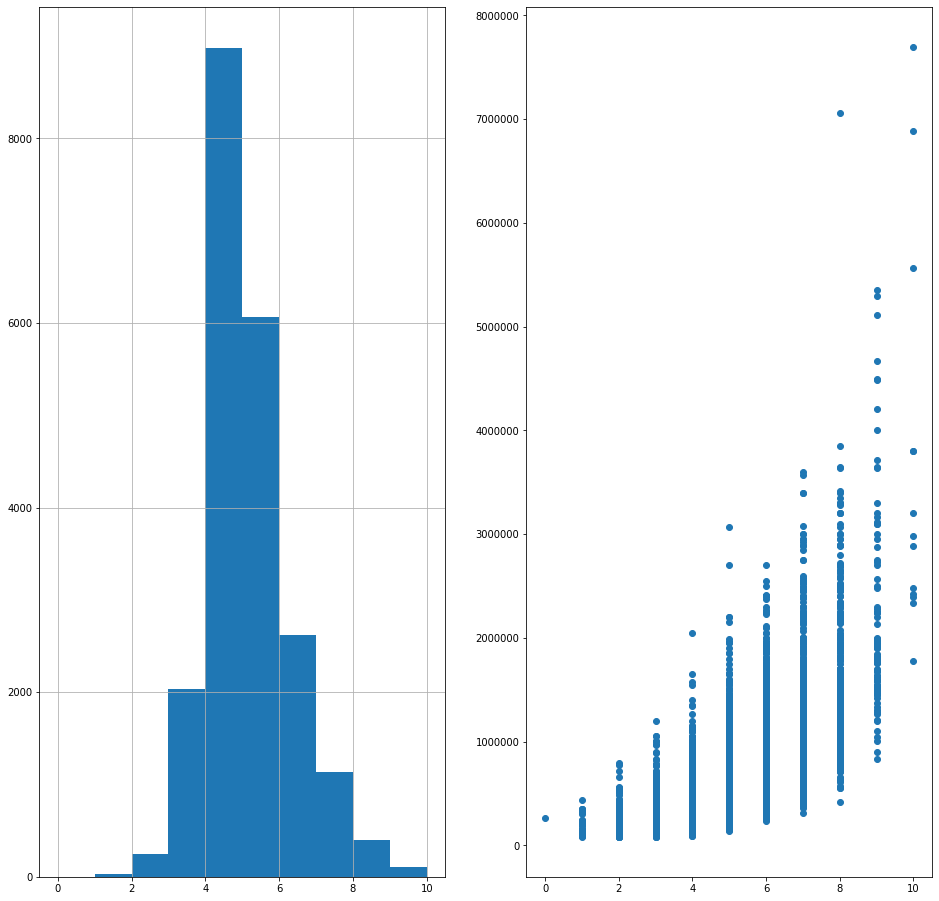

In [69]:
check_column(kc, 'grade')


In [70]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

from statsmodels.formula.api import ols

In [ ]:
kc.head()

## Zip Codes What to do???

Interesting... initial hist demonstrates trends, even though zipcodes aren't correlation but not linear  there are zip codes that command a higher price - that is clear...  would need to look group first... 
**how do I do that?** how could I graph this? 'kc.groupby('zipcode')['price'].mean()'

**Mapping longitude and latitude while cross-referencing price demonstrates this, how to show correlation?**

In [71]:
kc['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [72]:
#there are 70 zip codes, are these categorical values? looking at histogram for more information
#on how to categorize zip codes
kc['zipcode'].describe()

count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

In [ ]:
import plotly.graph_objects as go

In [74]:
import plotly.express as px


In [73]:
kc['zipcode'].hist(figsize=(10,8))

In [ ]:
##upon inspection, one idea is that zip codes appear to have some sort of 
#continuous values that could be binned into 10 ?

In [ ]:
#int_zipcode = kc['zipcode'].astype('str').astype('int')

In [ ]:
#bins = [98000, 98020, 98040, 98060, 98080, 98100, 98120, 98140, 98160, 98177, 98200]

In [ ]:
#bins_zip = pd.cut(kc['zipcode'].astype('str').astype('float'), bins)
#bins_zip = bins_zip.cat.as_ordered()
#bins_zip.head()

In [ ]:
#bins_zip.value_counts().plot(kind='bar', figsize=(11,8))

In [ ]:
#kc['zip_bins'] = bins_zip

In [ ]:
#cat_zip_bins1 = kc['zip_bins'].astype('category')
#coded_zip_bins1 = cat_zip_bins1.cat.codes
#kc['zip_bins'] = coded_zip_bins1

Creating a categorical codes for zip to compare to evaluate the difference with 70 different categories.

In [75]:
display(kc.head())

date     price  bedrooms  ...  yr_reno  last_upgrade  yrs_since_last_upgrade
0 2014-10-13  221900.0         3  ...        0          1955                      64
1 2014-12-09  538000.0         3  ...     1991          1991                      28
2 2015-02-25  180000.0         2  ...        0          1933                      86
3 2014-12-09  604000.0         4  ...        0          1965                      54
4 2015-02-18  510000.0         3  ...        0          1987                      32

[5 rows x 23 columns]

In [76]:
cat_zip = kc['zipcode'].astype('category')
coded_zip = cat_zip.cat.codes
kc['zip_cats'] = coded_zip

DataType:
	 int8
Null Values Present = 0


count    21597.000
mean        35.150
std         19.249
min          0.000
25%         21.000
50%         34.000
75%         52.000
max         69.000
Name: zip_cats, dtype: float64


Value Counts:


42    0.027874
23    0.027272
49    0.026994
28    0.026578
51    0.025605
        ...   
41    0.004815
8     0.004630
14    0.003704
61    0.002639
24    0.002315
Name: zip_cats, Length: 70, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000209A67AA940>,
       dtype=object))

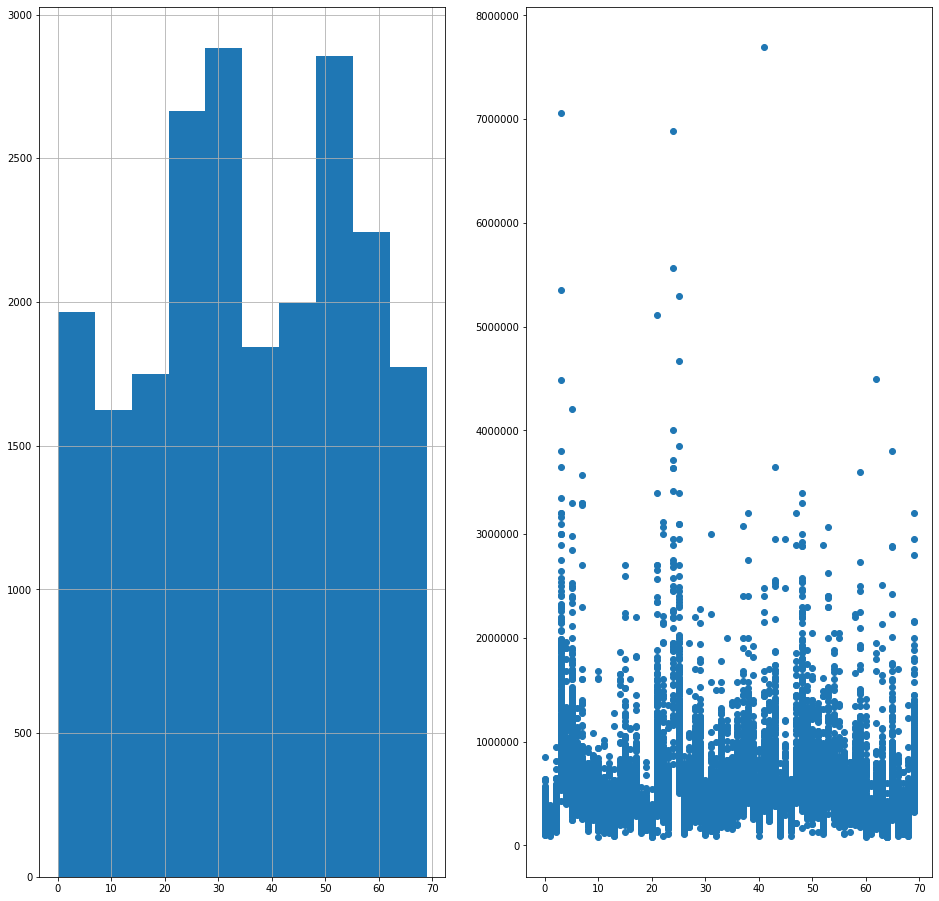

In [77]:
check_column(kc, 'zip_cats')

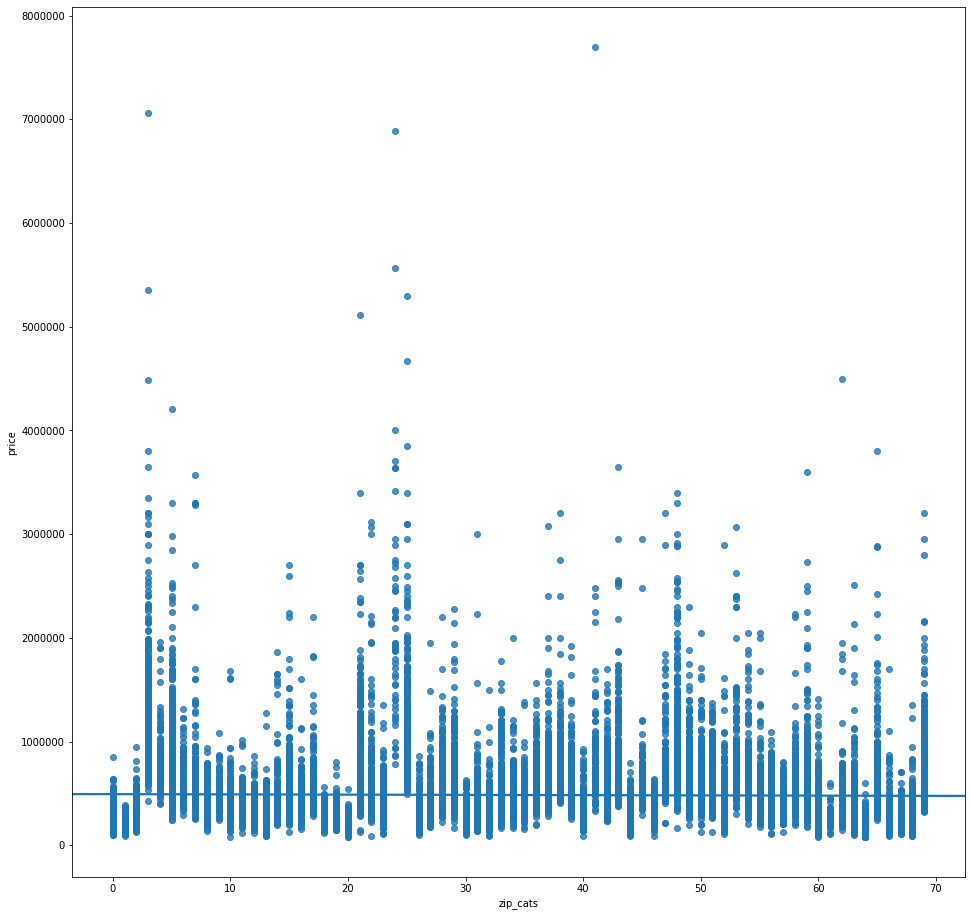

In [78]:
sns.regplot(kc['zip_cats'], kc['price'], robust=True)

In [79]:
zip_price = kc.groupby('zipcode')['price'].mean().sort_values(ascending=False)

In [80]:
zip_price.head(10)

zipcode
98039    2.161300e+06
98004    1.356524e+06
98040    1.194874e+06
98112    1.096239e+06
98102    8.996077e+05
98109    8.800778e+05
98105    8.632289e+05
98006    8.599386e+05
98119    8.497148e+05
98005    8.102897e+05
Name: price, dtype: float64

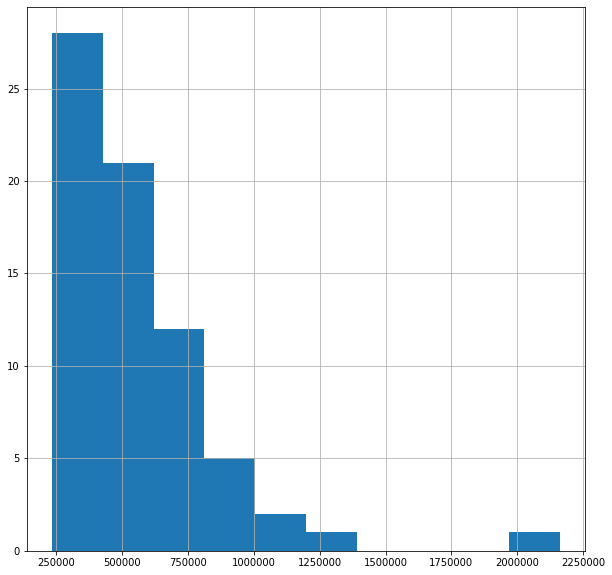

In [81]:
zip_price.hist(figsize=(10,10));

In [82]:
px.histogram(kc, x='zipcode', y='price', histfunc='avg')

In [ ]:
##what's the best way to plot this?

### or I could handle it with lat/long

No handles with labels found to put in legend.


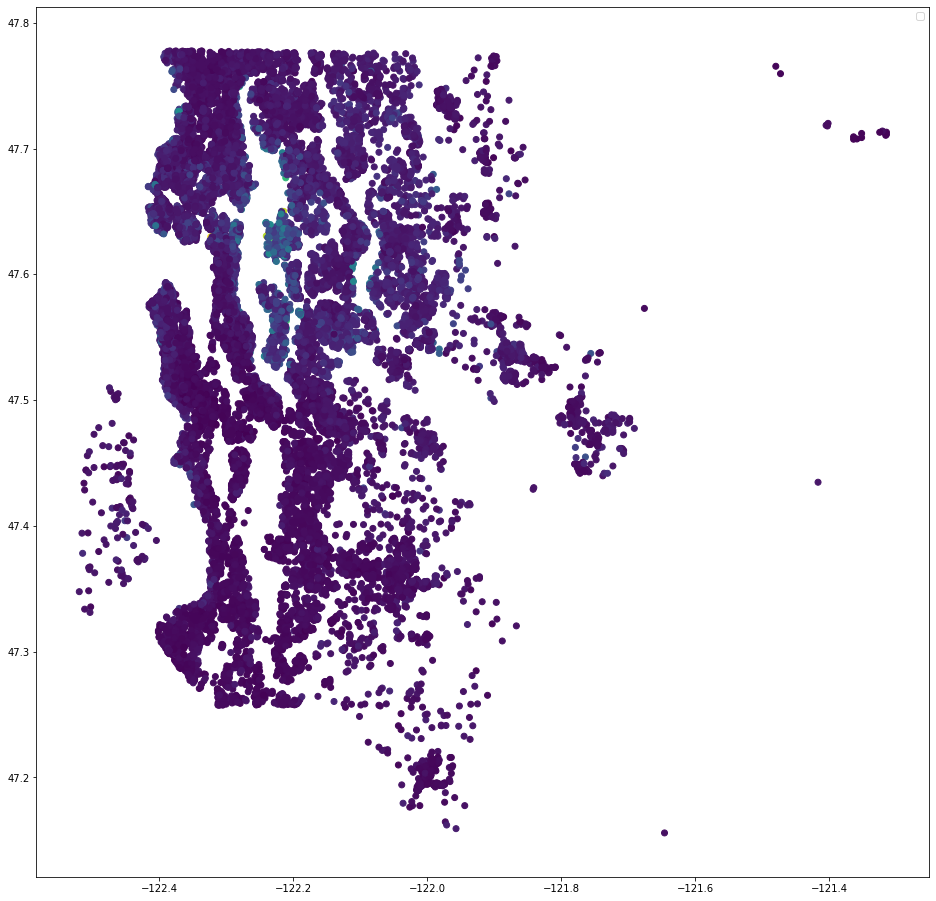

<Figure size 1296x1296 with 0 Axes>

In [83]:
fig = plt.figure()
plt.scatter(x=kc['long'], y=kc['lat'], c=kc['price'])
plt.legend()
plt.figure(figsize=(18,18))

plt.show()
###how do I get the legend to show

## Another Look and Futher Cleaning of Numeric Data

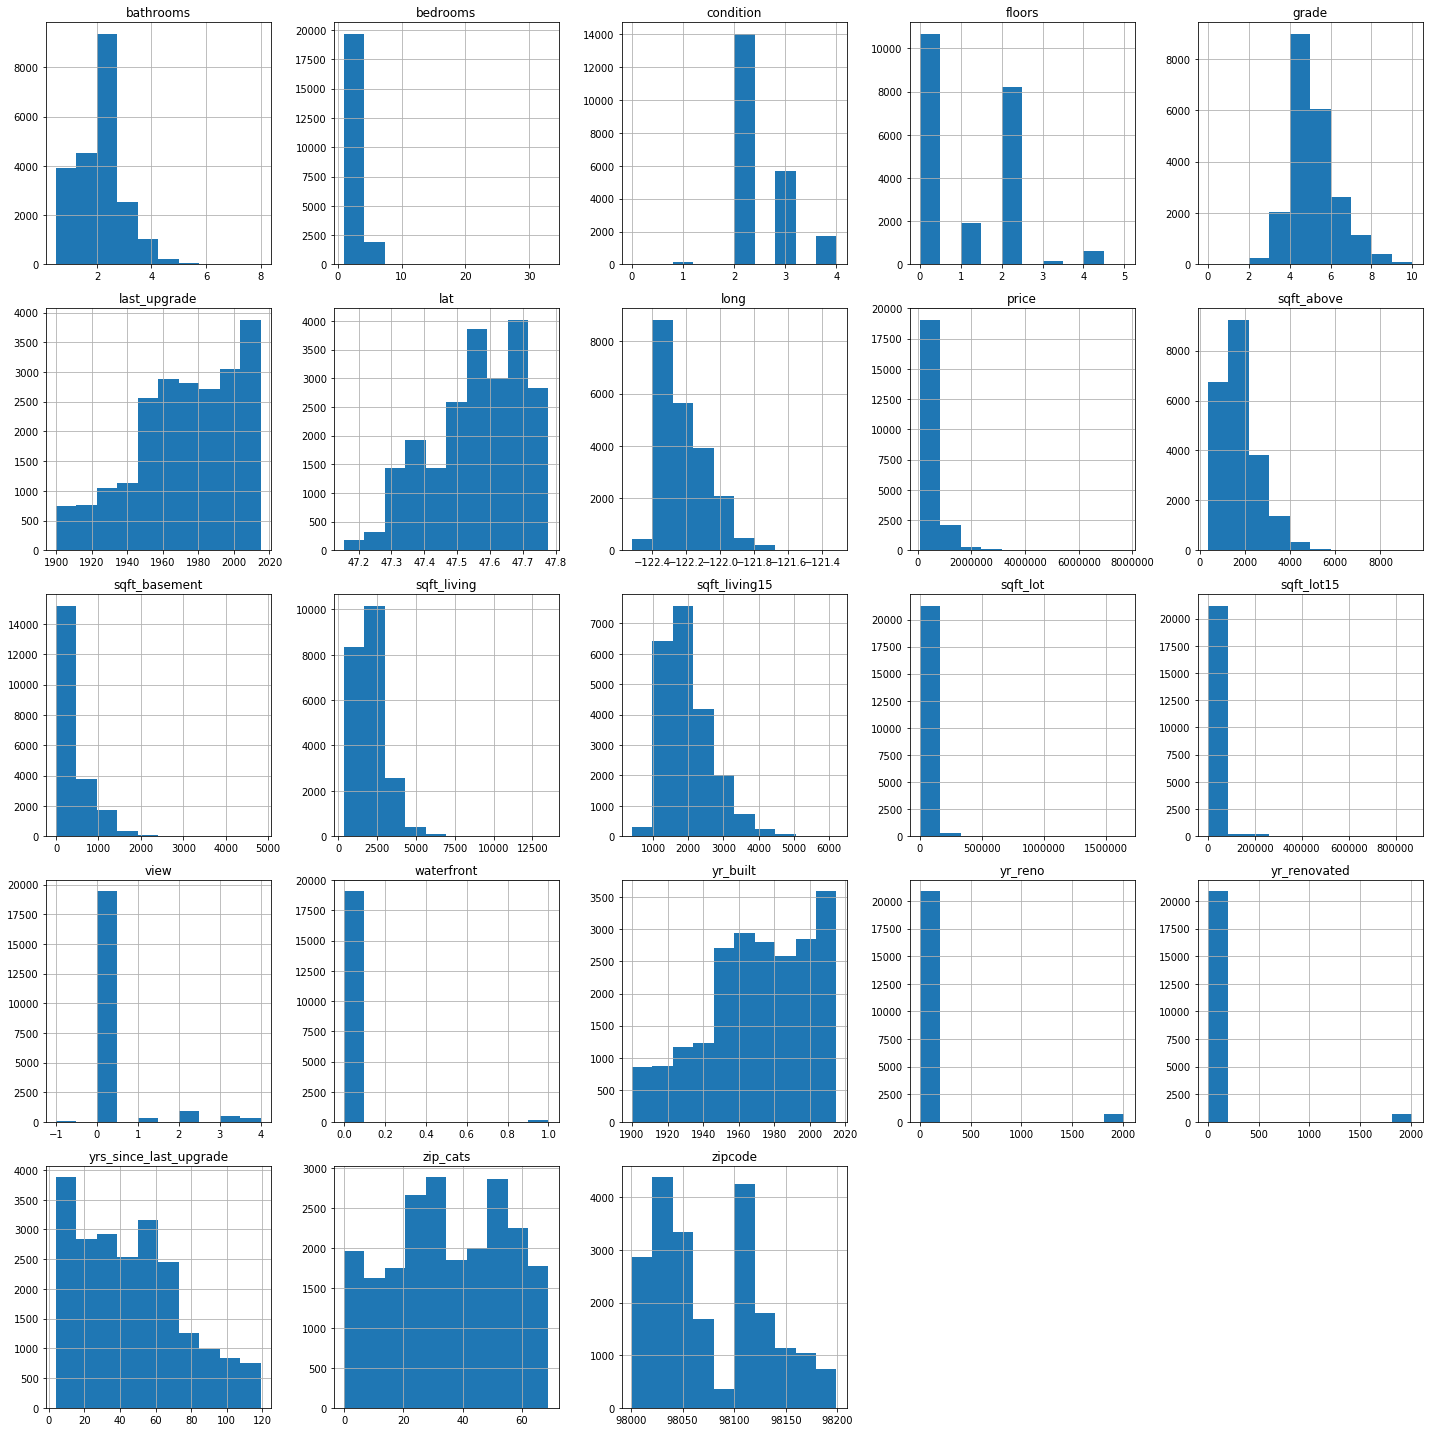

In [84]:
kc.hist(figsize=(20,20));
plt.tight_layout()

### Sqft Living

skewed distribution, correlation, removed outliers **kc2** is new df

DataType:
	 int64
Null Values Present = 0


count    21597.000
mean      2080.322
std        918.106
min        370.000
25%       1430.000
50%       1910.000
75%       2550.000
max      13540.000
Name: sqft_living, dtype: float64


Value Counts:


1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
          ...   
4970    0.000046
2905    0.000046
2793    0.000046
4810    0.000046
1975    0.000046
Name: sqft_living, Length: 1034, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000209BDF66438>,
       dtype=object))

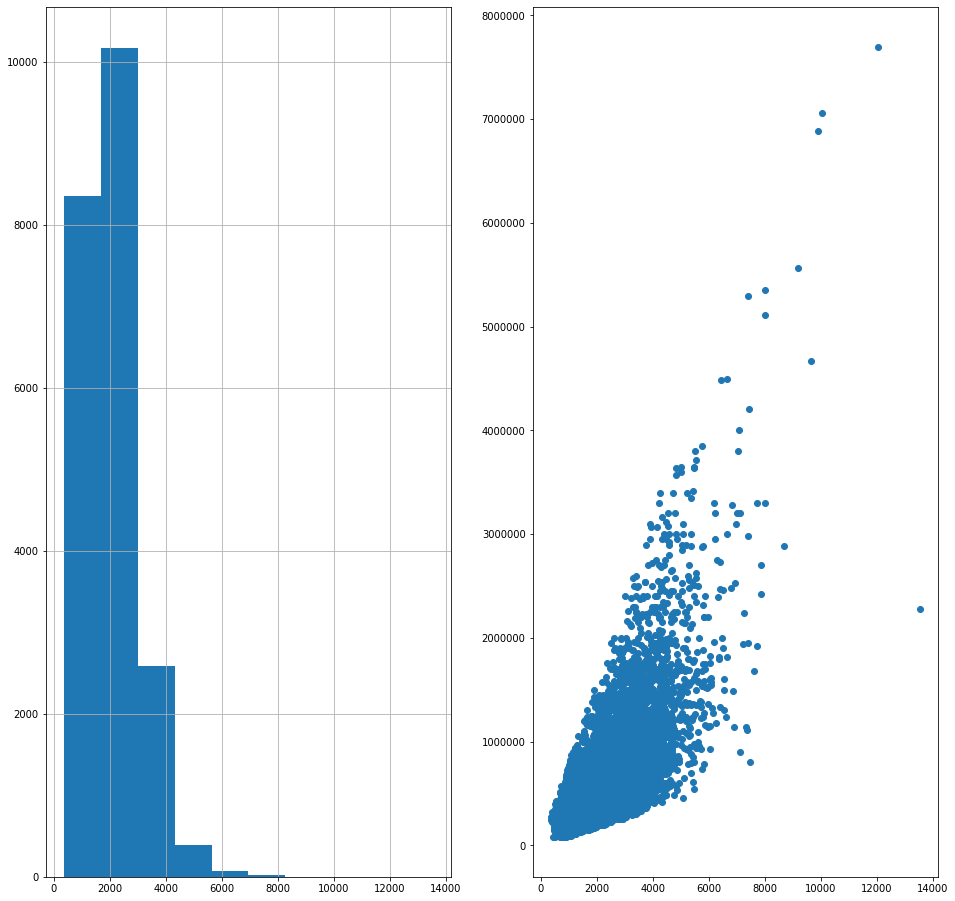

In [85]:
check_column(kc, 'sqft_living')

In [86]:
kc.head(6)

date      price  ...  yrs_since_last_upgrade  zip_cats
0 2014-10-13   221900.0  ...                      64        66
1 2014-12-09   538000.0  ...                      28        55
2 2015-02-25   180000.0  ...                      86        16
3 2014-12-09   604000.0  ...                      54        58
4 2015-02-18   510000.0  ...                      32        37
5 2014-05-12  1230000.0  ...                      18        29

[6 rows x 24 columns]

#### Removing outliers based on zscores: all those with a zscore higher than 3 standard deviations from the mean will be eliminated

In [88]:

import scipy.stats as stats
z_score = np.abs(stats.zscore(kc['sqft_living']))


In [89]:
kc['sqft_living_zscore'] = z_score

In [90]:
kc2 = kc.loc[kc['sqft_living_zscore'] < 3]

#### Examining data after outlier removal and updating function for future checks: 

In [92]:
def check_column(df, col_name, n_unique=10):
    """Displays info on null values, datatype, unqiue values
    and displays .describe()
    
    Args:
        df (df): contains the columns
        col_name (str): name of the df column to show
        n_unique (int): Number of unique values top show.
    
    Return:
        fig, ax (Matplotlib Figure and Axes)
    """
    
    print('DataType:')
    print('\t',df[col_name].dtypes)
    
    num_nulls = df[col_name].isna().sum()
    print(f'Null Values Present = {num_nulls}')
    
    display(df[col_name].describe().round(3))
    
    print('\nValue Counts:')
    display(df[col_name].value_counts(n_unique)) 
    
 
    
    ## Add some EDA figures
    fig, ax = plt.subplots(ncols=2);
    
    df[col_name].hist(ax=ax[0])
    ax[1].scatter(df[col_name], kc2['price'])
    
    return fig,ax

#check_column(df,'condition')

DataType:
	 int64
Null Values Present = 0


count    21349.000
mean      2036.837
std        820.675
min        370.000
25%       1420.000
50%       1900.000
75%       2520.000
max       4830.000
Name: sqft_living, dtype: float64


Value Counts:


1300    0.006464
1400    0.006323
1440    0.006230
1660    0.006042
1010    0.006042
          ...   
2665    0.000047
4810    0.000047
2793    0.000047
2905    0.000047
2007    0.000047
Name: sqft_living, Length: 874, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000209BDFD35F8>,
       dtype=object))

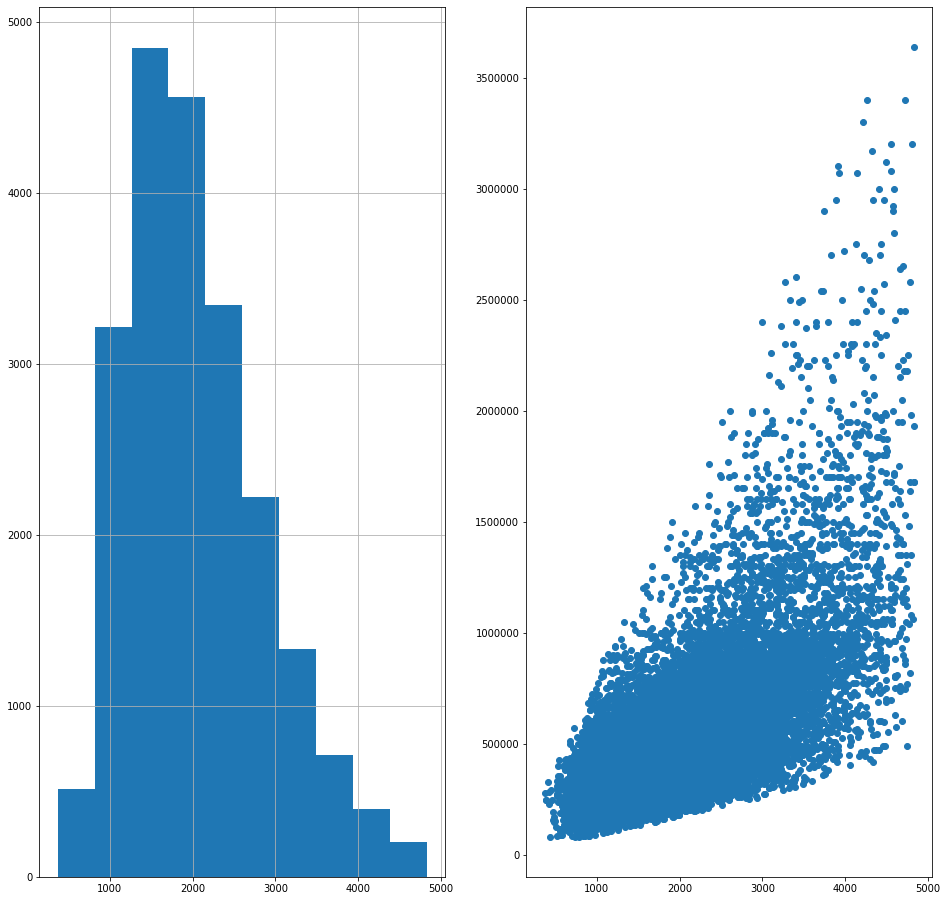

In [93]:
check_column(kc2, 'sqft_living')

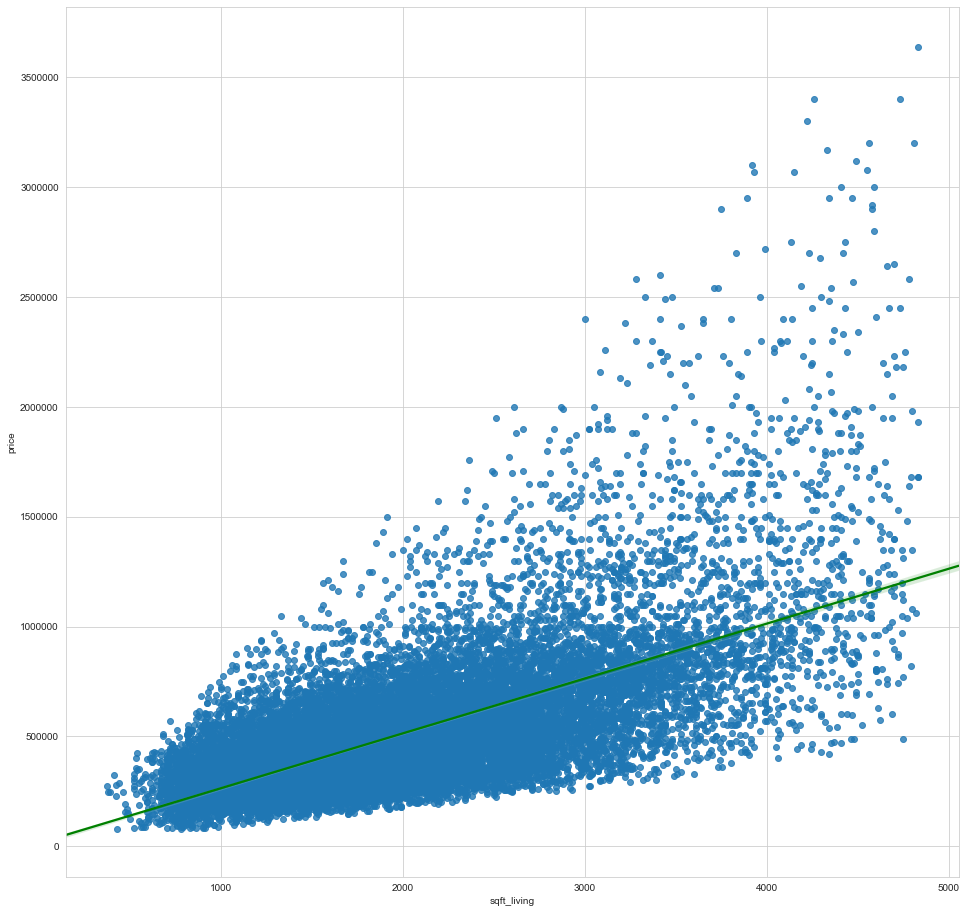

In [97]:
sns.set_style('whitegrid')
sns.regplot(kc2['sqft_living'], kc2['price'],line_kws={"color": "green"})
figure = figsize=(8,8)

### Sqft_above

Initial inspection skewed distribution, correlated with price

In [ ]:

#looking at 
check_column(kc2,'sqft_above');



In [ ]:
sns.regplot(kc2['sqft_living'], kc2['price'],line_kws={"color": "green"})

In [ ]:
kc2.hist(figsize=(16,16));
plt.tight_layout()

In [ ]:
kc2.head()

### sqft_living15

skewed, strong correlation with price - mean- 1966, min 399, max 5790

In [ ]:
check_column(kc2, 'sqft_living15')

In [ ]:
sns.regplot(kc2['sqft_living15'], kc2['price'],line_kws={"color": "green"})

In [ ]:
kc2.head()

### Bedrooms

skewed, correlates to 5 bedrooms, after that, not really -removing outliers

In [ ]:
check_column(kc2, 'bedrooms')

In [ ]:
z_score1 = np.abs(stats.zscore(kc2['bedrooms']))

In [ ]:
kc2['bedrooms_z_score'] = z_score1

In [ ]:
kc2 = kc2.loc[kc2['bedrooms_z_score'] < 3]

In [ ]:
check_column(kc2, 'bedrooms')

In [ ]:
sns.regplot(kc2['bedrooms'], kc2['price'],line_kws={"color": "green"})

### Year built or last upgrade  - see renovation

no correlation

In [ ]:
kc.head()

In [ ]:
check_column(kc2, 'last_upgrade')

In [ ]:
sns.regplot(kc2['last_upgrade'], kc2['price'],line_kws={"color": "green"})

In [ ]:
kc2.head()

### Bathrooms

Mean 2 , Max 5 Correlation, but after 3 not really

In [ ]:
kc2['bathrooms'].describe()

In [ ]:
check_column(kc2, 'bathrooms')

In [ ]:
sns.regplot(kc2['bathrooms'], kc2['price'],line_kws={"color": "green"})

### sqft_lot 
no obvious correlation obvious outliers

In [ ]:
check_column(kc2, 'sqft_lot')

### Sft_lot15  

very skewed distribution, no obvious correlation, obvious outliers

In [ ]:
check_column(kc2, 'sqft_lot15')

In [ ]:
sns.regplot(kc2['sqft_lot15'], kc2['price'],line_kws={"color": "green"})

## Multicollinearity

Categorical Inspection:

In [ ]:
cols_to_plot = ['floors', 'view', 'condition', 'grade', 'zipcode']

fig, axes = plt.subplots(nrows=1,ncols=5)

for i, col in enumerate(cols_to_plot):
    axes[i].scatter(x=kc2[col], y=kc2['price'])
    
plt.tight_layout()


    
### Looking for high correlations between categories before transforming/modifying the data or making decisions

In [ ]:
corr = kc2.corr().round(3)
corr

### Checking Visually

In [ ]:
#checking visually:
def multiplot(corr, figsize=(16,16)):
    fig, ax = plt.subplots(figsize=figsize)
    
    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True
    
    sns.heatmap(np.abs(corr),square=True, mask=mask, annot=True, cmap='Reds', ax=ax)
    return fig, ax

In [ ]:
multiplot(np.abs(kc2.corr().round(3)))

### Observations :

zip_code needs to be edited out from model when evaluating 



Highly correlated variables:
    - sqft_living - This one was highly correlated directly to price, on the fence about dropping it - might go down if I drop other sqft_above and others...
    - grade - This factor was highly correlated directly to price, on the fence about dropping it - might go down if I drop some others
    - sqft_above
    - last_upgrade
    - zip_cats - maybe drop zip code for now 
    - yr_reno
 

**Columns/ Categories to drop**

Dropping sqft_above based on high multicollinearity correlation (mc)

Dropping yr_reno and yr_renovated based on high mc and very low number associated with renovations

Dropping id -since it has no value associated with it by definition

Dropping bedrooms_z_score and sqft_living_zscore since they are for determining outliers only


In [ ]:
drop_cols = ['sqft_above','yr_reno', 'bedrooms_z_score', 'sqft_living_zscore']
kc2.drop(drop_cols,axis=1,inplace=True)

In [ ]:
multiplot(np.abs(kc2.corr().round(3)), figsize=(20,20))

### additional observations after first drop:

**Keeping, despite high mc:**

    grade, and  
    sqft_living 
    
   both are correlated with price

**Dropping**

droppping sqft_living15 since this concept captured under sqft_lot15 and 

dropping sqft_lot since it wasn't highly correlated in initial inspection and sqft_lot15 might reflect some of this data.

forgot to drop yr_renovated so doing that now

dropping yr_built even though there's not high correlation, last_upgrade captures this data

...still deciding what to do with lat/long and zipcode/zip_cats



In [ ]:
drop_cols = ['sqft_living15','sqft_lot', 'yr_renovated', 'yr_built']
kc2.drop(drop_cols,axis=1,inplace=True)

In [ ]:
multiplot(np.abs(kc2.corr().round(3)), figsize=(20,20))

## Observations after multicollinearity and looking at price after further data cleaning and dropping outliers based on factors other than price:

These look better even though grade and sqft living are both equally correlated and rather high


### Price 
    Mean - $522K seems about right,  Min$78K Max; $3.6M 50% is $449K so close to mean... seems normal.

In [ ]:
check_column(kc2, 'price')

## Normalizing

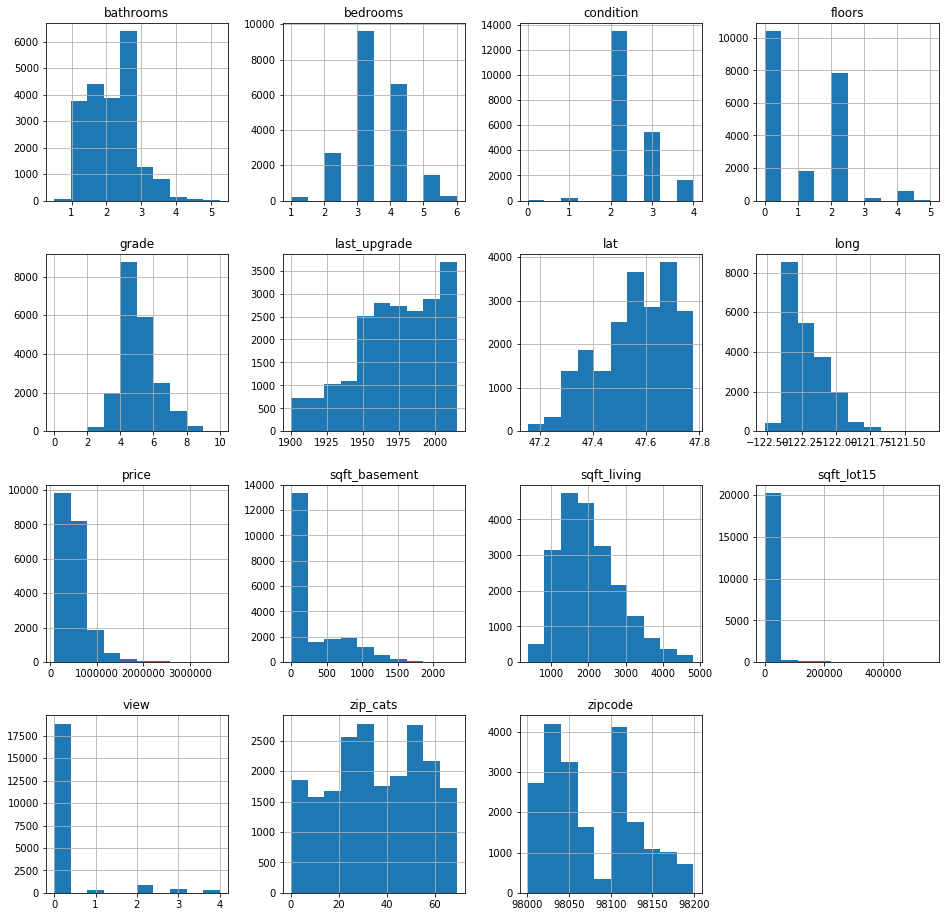

In [132]:
kc2.hist(figsize=(16,16));

## observations on distributions:  

Normal Distributions:
Grade 

Skewed: 
sqft_living - do I normalize this?

Leaving the rest alone to see how it works first round.



In [133]:
#code to log transform for normalization
#log_cols = ['']

#for col in log_cols:
#    kc[col+ '_log'] = np.log(kc[col])

## Scaling

In [134]:
kc2.head()

date     price  bedrooms  ...  sqft_lot15  last_upgrade  zip_cats
0 2014-10-13  221900.0         3  ...        5650          1955        66
1 2014-12-09  538000.0         3  ...        7639          1991        55
2 2015-02-25  180000.0         2  ...        8062          1933        16
3 2014-12-09  604000.0         4  ...        5000          1965        58
4 2015-02-18  510000.0         3  ...        7503          1987        37

[5 rows x 16 columns]

### reminder on cat cols from 5.2 :
- floors -assigned category code
- view - assigned category code

 - condition - assigned category code
- grade - assigned category code
- zipcode - assigned a category code after evaluation.





In [135]:
cat_cols = ['floors', 'view', 'condition', 'grade', 'zip_cats']

In [136]:
num_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_lot15']

In [137]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(kc2[num_cols])

In [138]:
scaled_data = scaler.fit_transform(kc2[cat_cols])

## Dropping

In [139]:
#code to drop anything else that will pull away from model:
drop_cols = ['date']
kc2.drop(drop_cols,axis=1)


price  bedrooms  bathrooms  ...  sqft_lot15  last_upgrade  zip_cats
0      221900.0         3       1.00  ...        5650          1955        66
1      538000.0         3       2.25  ...        7639          1991        55
2      180000.0         2       1.00  ...        8062          1933        16
3      604000.0         4       3.00  ...        5000          1965        58
4      510000.0         3       2.00  ...        7503          1987        37
...         ...       ...        ...  ...         ...           ...       ...
21592  360000.0         3       2.50  ...        1509          2009        42
21593  400000.0         4       2.50  ...        7200          2014        60
21594  402101.0         2       0.75  ...        2007          2009        59
21595  400000.0         3       2.50  ...        1287          2004        15
21596  325000.0         2       0.75  ...        1357          2008        59

[20787 rows x 15 columns]

# Model

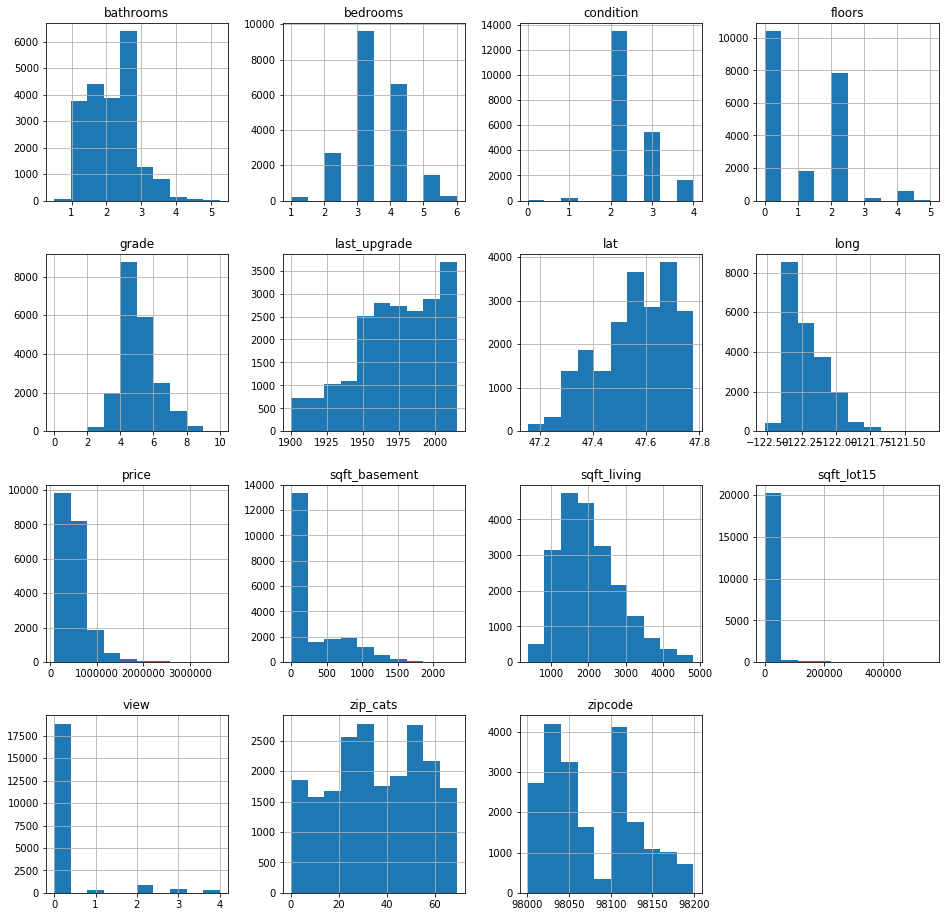

In [140]:
kc2.hist(figsize=(16,16));

In [141]:
kc2.head()

date     price  bedrooms  ...  sqft_lot15  last_upgrade  zip_cats
0 2014-10-13  221900.0         3  ...        5650          1955        66
1 2014-12-09  538000.0         3  ...        7639          1991        55
2 2015-02-25  180000.0         2  ...        8062          1933        16
3 2014-12-09  604000.0         4  ...        5000          1965        58
4 2015-02-18  510000.0         3  ...        7503          1987        37

[5 rows x 16 columns]

In [142]:
# Importing necessary tools
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [144]:
#building calling the appropriate columns to build model with:
cols = kc2.drop(['price', 'date', 'floors', 'sqft_lot15'], axis=1).columns
str_cols = '  + '.join(cols)
str_cols
#after first round of testing dropped floors
#after second round of testing dropped sqft_lot 15 pvalue was .123

## taking out categories I'm not sure how to handle:
#zipcode, lat, long, last_upgrade, zip_cats

##dropping condition from initial inspection and sft_basement

'bedrooms  + bathrooms  + sqft_living  + view  + condition  + grade  + sqft_basement  + zipcode  + lat  + long  + last_upgrade  + zip_cats'

In [145]:
#build formula
formula = 'price~' + str_cols
formula

'price~bedrooms  + bathrooms  + sqft_living  + view  + condition  + grade  + sqft_basement  + zipcode  + lat  + long  + last_upgrade  + zip_cats'

In [146]:
#modeling
model = smf.ols(formula=formula, data=kc2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     3438.
Date:                Mon, 11 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:38:35   Log-Likelihood:            -2.8109e+05
No. Observations:               20787   AIC:                         5.622e+05
Df Residuals:                   20774   BIC:                         5.623e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.525e+07   1.33e+07     -6.388      0.000   -1.11e+08   -5.91e+07
bedrooms      -2.815e+04   1888.837    -14.904      0.000   -3.19e+04   -2.44e+04
bathrooms      3.635e+04   2928.286     12.414      0.000    3.06e+04    4.21e+04
sqft_living     155.5764      3.264     47.658      0.000     149.178     161.975
view           8.202e+04   1824.119     44.965      0.000    7.84e+04    8.56e+04
condition      2.843e+04   2145.014     13.254      0.000    2.42e+04    3.26e+04
grade           9.89e+04   1904.644     51.926      0.000    9.52e+04    1.03e+05
sqft_basement   -34.7481      3.650     -9.519      0.000     -41.903     -27.593
zipcode         383.3875    139.039      2.757      0.006     110.861     655.914
lat            6.282e+05   9949.200     63.139      0.000    6.09e+05    6.48e+05
long          -1.762e+05   1.18e+04    -14.891      0.000   -1.99e+05   -1.53e+05
last_upgrade  -2019.9020     63.591    -31.764      0.000   -2144.545   -1895.259
zip_cats      -2431.5658    376.613     -6.456      0.000   -3169.756   -1693.375
==============================================================================
Omnibus:                    11824.553   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           215546.328
Skew:                           2.362   Prob(JB):                         0.00
Kurtosis:                      18.052   Cond. No.                     1.05e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Fit Testing: QQ Plot and Scatter

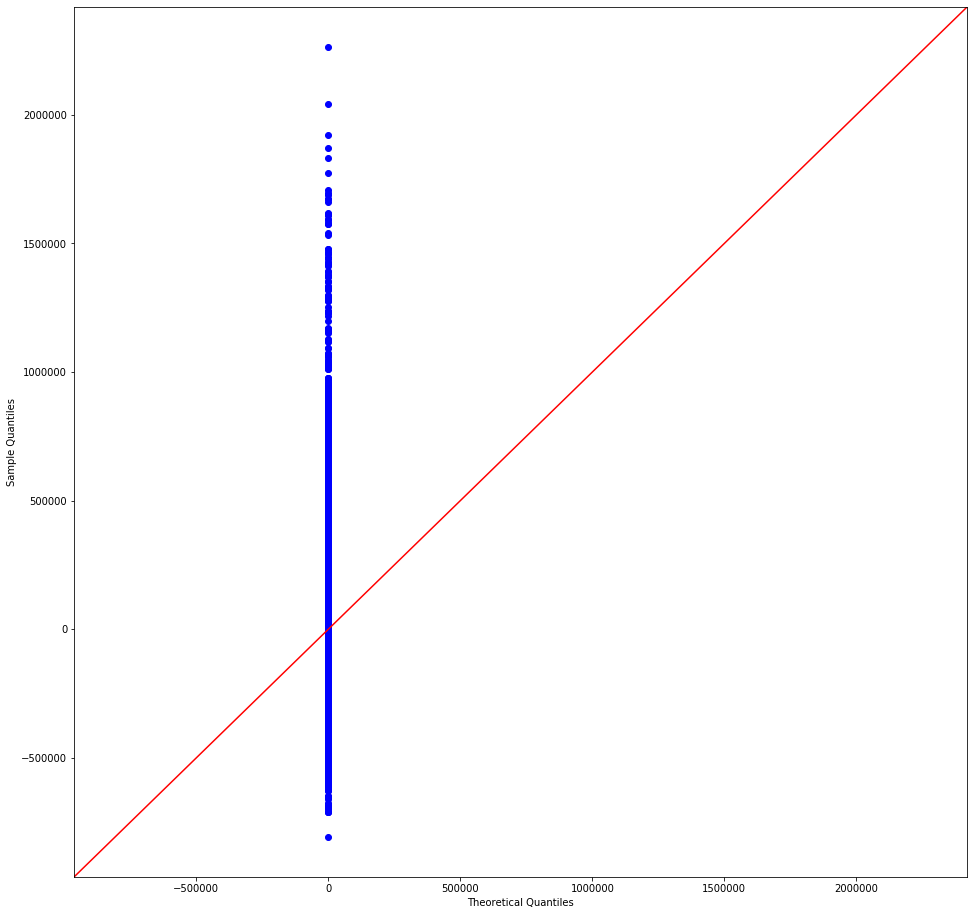

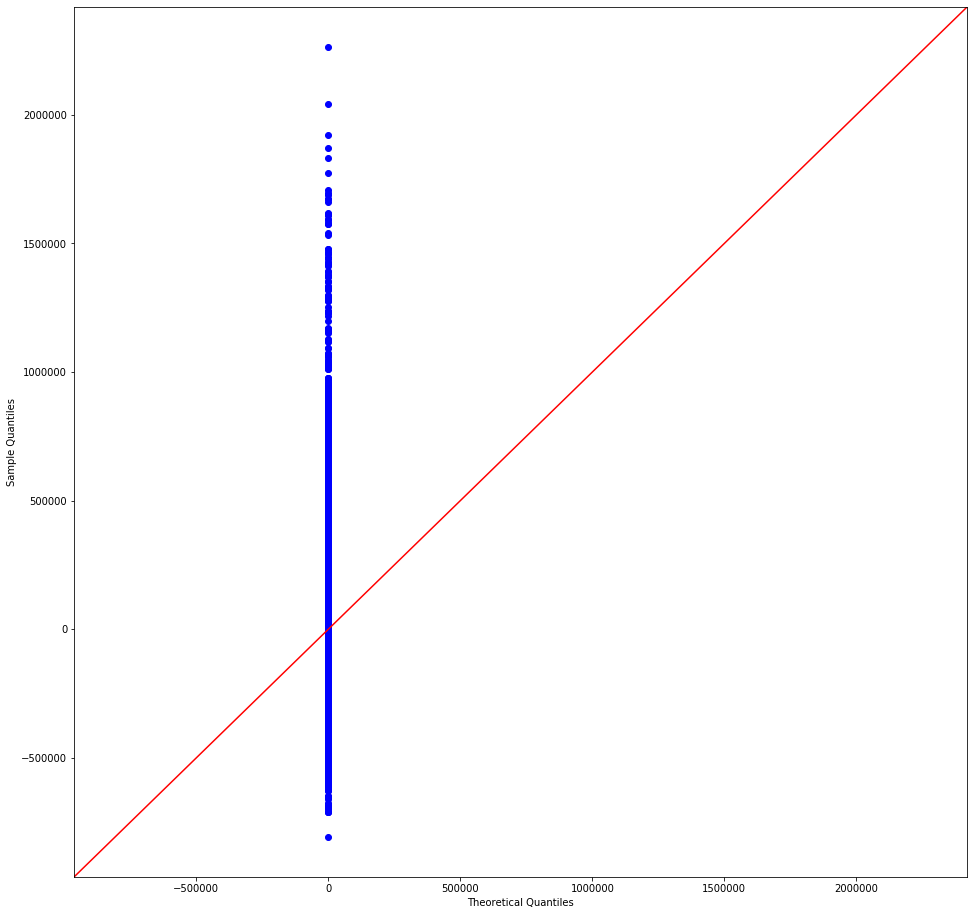

In [179]:
resids = model.resid
import scipy.stats as stats

sm.graphics.qqplot(resids, stats.norm, line = '45')

In [173]:
def scatter_mean(df, col_name):
   """Plot a scatter . plot """
   ax = model.summary(kind='scatter', x=x, y=y, figsize=figsize)

In [177]:
scatter_mean(kc2, x=kc2['sqft_living'], y=kc2['price'])

TypeError: scatter_mean() got an unexpected keyword argument 'x'

## Validation

In [ ]:
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LinearRegression
#linreg = LinearRegression()

#x = kc.drop('price', axis=1).values
#y = kc('price').values

#kc_10_results = np.mean(cross_val_score(linreg, x, y, cv=10, scoring='r2'))

# Interpretation

# Conclusions and Recommendations:

# Annex: 

In [15]:
kc['yr_reno'].value_counts()

0       20853
2014       73
2003       31
2013       31
2007       30
        ...  
1976        1
1953        1
1951        1
1946        1
1944        1
Name: yr_reno, Length: 70, dtype: int64

In [16]:
kc3 = kc.loc[kc['yr_reno'] > 0]